The data preparation
The CNN modeling and evaluation
The results prediction and submission

The dataset contains 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,Activation
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.3.0'

## Load the data

In [3]:
mnist=tf.keras.datasets.mnist

In [4]:

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()






In [5]:
x_train.shape

(60000, 28, 28)

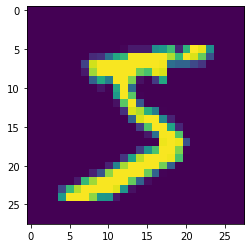

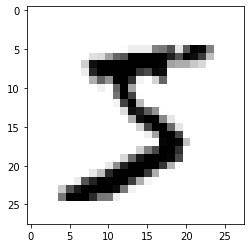

In [6]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)

## Data Preprocessing

In [7]:
print(x_train[0])#before normalization,check the values of each pixels

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

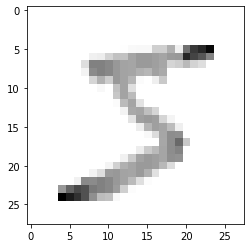

In [8]:
#NOrmalize the data
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

plt.imshow(x_train[0],cmap=plt.cm.binary)

In [9]:
print(x_train[0])#after normalization

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
print(y_train[0])#check that we have labels inside our network

5


In [11]:
IMG_SIZE=28
x_trainr = np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr = np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)

print('Training samples dimension',x_trainr.shape)
print('Testing samples dimension',x_testr.shape)

Training samples dimension (60000, 28, 28, 1)
Testing samples dimension (10000, 28, 28, 1)


##  Model Creation

In [12]:
# Part 2 - Building the CNN

# Initialising the CNN
model=Sequential()

# 1st Convolution Layers(28-3+1)
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

   
#2nd Convolution Layers(26-3+1)
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
          
# 3rd Convolution Layers(24-3+1)
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))   

#Fully connected layer

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

#Fully connected layer


model.add(Dense(32))
model.add(Activation('relu'))

#last Fully connected layer

model.add(Dense(10))
model.add(Activation('softmax'))
   



In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [14]:
# Part 3 - Training the CNN

# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
model.fit(x_trainr, y_train, epochs = 5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 50s 38ms/step - loss: 0.3240 - accuracy: 0.8989 - val_loss: 0.1265 - val_accuracy: 0.9607
Epoch 2/5
1313/1313 [==============================] - 50s 38ms/step - loss: 0.1040 - accuracy: 0.9678 - val_loss: 0.0980 - val_accuracy: 0.9701
Epoch 3/5
1313/1313 [==============================] - 50s 38ms/step - loss: 0.0747 - accuracy: 0.9756 - val_loss: 0.0696 - val_accuracy: 0.9789
Epoch 4/5
1313/1313 [==============================] - 42s 32ms/step - loss: 0.0573 - accuracy: 0.9813 - val_loss: 0.0601 - val_accuracy: 0.9816
Epoch 5/5
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0468 - accuracy: 0.9856 - val_loss: 0.0649 - val_accuracy: 0.9818


In [15]:
test_loss,test_acc=model.evaluate(x_testr,y_test)
print('Test loss on 10000 test samples',test_loss)
print('Validation Accuracy on 10000 test samples',test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0646 - accuracy: 0.9828
Test loss on 10000 test samples 0.06456825882196426
Validation Accuracy on 10000 test samples 0.9828000068664551


## Model Evaluation

In [16]:
predictions=model.predict([x_testr])


In [17]:
print(predictions)

[[5.9883280e-07 4.8362199e-06 3.6740794e-06 ... 9.9997985e-01
  1.7077779e-08 7.8314388e-06]
 [4.3679875e-06 4.5951769e-08 9.9997354e-01 ... 2.2039587e-05
  3.7023968e-09 9.4792607e-10]
 [2.3101151e-08 9.9998689e-01 2.0063204e-08 ... 1.1574296e-05
  2.9171210e-07 5.8705962e-07]
 ...
 [1.0394311e-08 6.0122386e-07 1.5087675e-08 ... 5.5792658e-08
  4.3796795e-06 8.3454115e-06]
 [5.3738318e-06 2.5675712e-10 3.8716333e-08 ... 5.9485272e-10
  1.1951858e-04 5.0564074e-07]
 [1.6264453e-04 8.4880547e-09 6.6801426e-06 ... 5.4225485e-10
  3.9753775e-07 2.8010902e-07]]


In [18]:
print(np.argmax(predictions[0]))

7


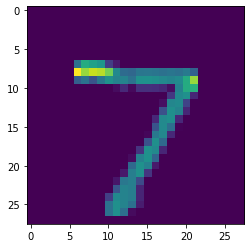

In [19]:
plt.imshow(x_test[0])#check the answer

In [20]:
print(np.argmax(predictions[128]))

8


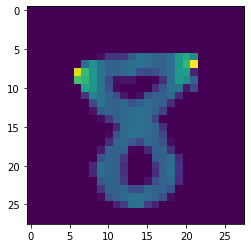

In [21]:
plt.imshow(x_test[128])

In [22]:
from tensorflow.keras.models import load_model

model.save('model_digits.h5')

In [23]:
from tensorflow.keras.models import load_model
 
# load model
models = load_model('model_digits.h5')

In [24]:
import cv2

In [25]:
img=cv2.imread('one.png')

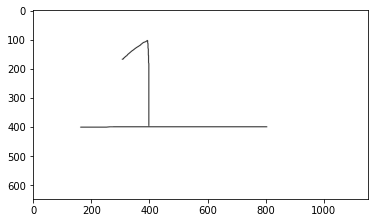

In [26]:
plt.imshow(img)

In [27]:
img.shape

(648, 1152, 3)

In [28]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [29]:
gray.shape

(648, 1152)

In [30]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [31]:
resized.shape

(28, 28)

In [32]:
newimg=tf.keras.utils.normalize(resized,axis=1)

In [33]:
newimg=np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [34]:
newimg.shape

(1, 28, 28, 1)

In [35]:
predictions=model.predict(newimg)

In [36]:
print(np.argmax(predictions))

0
